# 07_1_LEARN-DataAnalysisML

<a target="_blank" href="https://colab.research.google.com/github/hiyama341/ConStrain/blob/main/colab_notebooks/07_1_LEARN_DataAnalysis.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [49]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [108]:
# cloning the data repo
!git clone https://github.com/hiyama341/ConStrain_on_google_colab.git

fatal: destination path 'ConStrain_on_google_colab' already exists and is not an empty directory.


## 1. Setting up the AutoML library

In [26]:
%%capture 
!pip install h2o

In [109]:
import h2o
from h2o.automl import H2OAutoML

In [28]:
# If this doesnt work - install java. 
# Start the H2O cluster (locally)
h2o.init(ip="localhost", min_mem_size_GB=8)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_351"; Java(TM) SE Runtime Environment (build 1.8.0_351-b10); Java HotSpot(TM) 64-Bit Server VM (build 25.351-b10, mixed mode)
  Starting server from /Users/lucaslevassor/opt/anaconda3/envs/constrain/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/tmp7ncqwn4g
  JVM stdout: /var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/tmp7ncqwn4g/h2o_lucaslevassor_started_from_python.out
  JVM stderr: /var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/tmp7ncqwn4g/h2o_lucaslevassor_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,Europe/Copenhagen
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.3
H2O_cluster_version_age:,5 months and 3 days !!!
H2O_cluster_name:,H2O_from_python_lucaslevassor_oq84sp
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.536 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [110]:
#h2o.shutdown()

### 1.1 Import out dataframe to h20 object

Train a model based on the target and the df

In [111]:
# Run ML with new input 
new_input_for_ml = pd.read_csv('ConStrain_on_google_colab/Data/AutoML/input_for_ml_1st_iteration_all_analytics.csv')
new_input_for_ml

,Line_name,0,1,2,3,Amt_norm
0,yp49_A01,1,2,5,1,0.972701
1,yp49_C01,1,2,5,9,0.536658
2,yp49_D01,2,4,7,3,0.175896
3,yp49_E01,2,1,5,7,0.345201
4,yp49_F01,3,3,6,1,26.416324
...,...,...,...,...,...,...
162,yp51_C12,8,3,7,2,0.000000
163,yp51_D12,8,2,7,6,0.614962
164,yp51_E12,8,1,6,10,0.466688
165,yp50_F05,6,1,8,2,15.155009


In [112]:
new_input_for_ml['default_rank'] = new_input_for_ml['Amt_norm'].rank()
new_input_for_ml['max_rank'] = new_input_for_ml['Amt_norm'].rank(method='max')
new_input_for_ml['NA_bottom'] = new_input_for_ml['Amt_norm'].rank(na_option='bottom')
new_input_for_ml['pct_rank'] = new_input_for_ml['Amt_norm'].rank(pct=True)
new_input_for_ml = new_input_for_ml.sort_values(by= 'max_rank', ascending = False)

In [113]:
new_input_for_ml

,Line_name,0,1,2,3,Amt_norm,default_rank,max_rank,NA_bottom,pct_rank
73,yp50_D03,5,2,6,3,277.307816,167.0,167.0,167.0,1.000000
75,yp50_G03,6,2,6,5,176.917201,166.0,166.0,166.0,0.994012
86,yp50_E05,5,1,6,8,163.352037,165.0,165.0,165.0,0.988024
106,yp50_A09,4,2,6,3,152.013305,164.0,164.0,164.0,0.982036
126,yp51_A02,7,2,6,1,141.151036,163.0,163.0,163.0,0.976048
...,...,...,...,...,...,...,...,...,...,...
60,yp50_E01,5,3,5,7,0.000000,30.0,59.0,30.0,0.179641
114,yp50_D11,5,4,8,6,0.000000,30.0,59.0,30.0,0.179641
24,yp49_E05,2,3,7,8,0.000000,30.0,59.0,30.0,0.179641
27,yp49_H05,3,3,7,10,0.000000,30.0,59.0,30.0,0.179641


In [114]:
# Choosing which coloums to train on 
new_input_for_ml = new_input_for_ml[['Line_name','0','1','2','3','Amt_norm']]
new_input_for_ml.columns = ['Line_name','0','1','2','3','Amt_norm']

In [115]:
df_test = h2o.H2OFrame(pd.concat([new_input_for_ml], axis='columns'))
df_test.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Rows:167
Cols:6




,Line_name,0,1,2,3,Amt_norm
type,string,int,int,int,int,real
mins,NaN,1.0,1.0,5.0,1.0,0.0
mean,NaN,4.580838323353294,2.6826347305389233,6.562874251497007,5.305389221556882,17.189179575556167
maxs,NaN,8.0,4.0,8.0,10.0,277.3078163064027
sigma,NaN,2.253055064641254,1.1621014428030094,1.1696200092422182,2.8363232921290003,40.680610367197914
zeros,0,0,0,0,0,59
missing,0,0,0,0,0,0
0,yp50_D03,5.0,2.0,6.0,3.0,277.3078163064027
1,yp50_G03,6.0,2.0,6.0,5.0,176.91720093355448
2,yp50_E05,5.0,1.0,6.0,8.0,163.3520367899325


In [116]:
# Since the data is categorical we need to make it from numerical to categorical 
df_test['0']= df_test['0'].asfactor()
df_test['1']= df_test['1'].asfactor()
df_test['2'] = df_test['2'].asfactor()
df_test['3'] = df_test['3'].asfactor()

In [36]:
df_test.describe()

Rows:167
Cols:6




,Line_name,0,1,2,3,Amt_norm
type,string,enum,enum,enum,enum,real
mins,NaN,,,,,0.0
mean,NaN,,,,,17.189179575556167
maxs,NaN,,,,,277.3078163064027
sigma,NaN,,,,,40.680610367197914
zeros,0,,,,,59
missing,0,0,0,0,0,0
0,yp50_D03,5,2,6,3,277.3078163064027
1,yp50_G03,6,2,6,5,176.91720093355448
2,yp50_E05,5,1,6,8,163.3520367899325


Set some arguments for the autoML. 


Important here is that we dont split the dataset but rather keep the cross-validation validate a model internally, i.e., estimate the model performance without having to sacrifice a validation split. See: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/cross-validation.html


## 2. RUN automl

Here we are defining the autoML object and after we can train it

In [25]:
# Select the columns we want to train on
feature_cols = ['0', '1', '2', '3']

# Initialize H2O autoML class
AutoML = H2OAutoML(
    max_runtime_secs=0,  # 1 hour =int(3600 * 1) , if unlimited time is wanted then set this to zero = 0
    max_models=None,  # None =  no limit
    nfolds=10,         # number of folds for k-fold cross-validation (nfolds=0 disables cross-validation)
    seed=1,            # Reproducibility
    exclude_algos = ["StackedEnsemble"],
    sort_metric = "MAE",
    keep_cross_validation_predictions=True 
)

Train a model based on the target and the df. 


It has been Commented out and saved as showed below

In [26]:
%%time

AutoML.train(
     x=feature_cols,
     y='Amt_norm',
     training_frame=df_test,
 ) 

AutoML progress: |█
08:58:12.201: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 167.0.

██████████████████████████████████████████████████████████████| (done) 100%
CPU times: user 24.5 s, sys: 2.44 s, total: 26.9 s
Wall time: 1h 1s
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_2_AutoML_1_20221209_85809_model_9


Status of Neuron Layers: predicting Amt_norm, regression, gaussian distribution, Quadratic loss, 1,061 weights/biases, 16.6 KB, 1,671,670 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,30,Input,0.0,,,,,,,,,
1,,2,20,RectifierDropout,10.0,0.0,0.0,0.169847,0.358203,0.0,-0.031373,0.458804,0.561357,1.215919
2,,3,20,RectifierDropout,10.0,0.0,0.0,0.010633,0.015495,0.0,-0.089408,0.39644,0.93137,0.451503
3,,4,1,Linear,,0.0,0.0,0.003387,0.006785,0.0,0.132384,0.312417,-0.299421,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 39.01115385257731
RMSE: 6.245890957467742
MAE: 2.5267965052929355
RMSLE: 0.4544119607679618
Mean Residual Deviance: 39.01115385257731

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 323.87529535645905
RMSE: 17.996535648742483
MAE: 8.006487116567875
RMSLE: 0.8058587806699498
Mean Residual Deviance: 323.87529535645905

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,8.001637,2.794846,9.339675,7.473658,12.072308,6.150514,4.972028
1,mean_residual_deviance,324.272220,182.572080,349.755900,232.504040,632.437600,207.822170,198.841310
2,mse,324.272220,182.572080,349.755900,232.504040,632.437600,207.822170,198.841310
3,r2,0.784586,0.129884,0.879492,0.855647,0.558369,0.829438,0.799982
4,residual_deviance,324.272220,182.572080,349.755900,232.504040,632.437600,207.822170,198.841310
5,rmse,17.523062,4.638767,18.701761,15.248083,25.148314,14.416039,14.101110
6,rmsle,0.779322,0.232514,0.650242,0.824927,1.157851,0.704929,0.558661



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-12-09 09:16:18,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-12-09 09:16:18,5 min 30.808 sec,208750 obs/sec,10.0,1,1670.0,36.926132,1363.539217,24.757033,0.171102
2,,2022-12-09 09:16:22,5 min 34.363 sec,469306 obs/sec,10010.0,1001,1671670.0,6.245891,39.011154,2.526797,0.976285



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,0.1,1.000000,1.000000,0.079336
1,0.8,0.815249,0.815249,0.064679
2,3.6,0.777132,0.777132,0.061655
3,2.6,0.662416,0.662416,0.052553
4,1.3,0.657459,0.657459,0.052160
5,2.7,0.647225,0.647225,0.051348
6,1.2,0.629754,0.629754,0.049962
7,3.7,0.611516,0.611516,0.048515
8,1.4,0.610376,0.610376,0.048425
9,0.5,0.585890,0.585890,0.046482



See the whole table with table.as_data_frame()


In [27]:
print('DOOOOOOONE')

DOOOOOOONE


## 3. Processing model


In [28]:
# saving the models
leaderboard = AutoML.leaderboard
lb= leaderboard
model_ids = list(leaderboard['model_id'].as_data_frame().iloc[:,0])

out_path = 'ConStrain_on_google_colab/Data/processed/ML_data_leaderboard2'
for m_id in model_ids:
     mdl = h2o.get_model(m_id)
     h2o.save_model(model=mdl, path=out_path, force=True)


In [29]:
len(model_ids)

365

Now we want to extract the best models that are not StackedEnsemble

In [30]:
df_from_h2o_object = lb.as_data_frame(use_pandas=True, header=True)
df_from_h2o_object

,model_id,mae,rmse,mse,rmsle,mean_residual_deviance
0,DeepLearning_grid_2_AutoML_1_20221209_85809_model_9,8.006487,17.996536,323.875295,0.805859,323.875295
1,DeepLearning_grid_3_AutoML_1_20221209_85809_model_9,8.330762,18.341708,336.418236,0.878496,336.418236
2,DeepLearning_grid_2_AutoML_1_20221209_85809_model_46,8.590232,17.137088,293.679776,NaN,293.679776
3,DeepLearning_grid_3_AutoML_1_20221209_85809_model_13,8.892283,18.684480,349.109797,NaN,349.109797
4,DeepLearning_grid_2_AutoML_1_20221209_85809_model_37,8.996747,18.438190,339.966857,NaN,339.966857
...,...,...,...,...,...,...
360,DeepLearning_grid_2_AutoML_1_20221209_85809_model_17,43.034842,60.960278,3716.155508,NaN,3716.155508
361,DeepLearning_grid_3_AutoML_1_20221209_85809_model_46,49.618604,56.651760,3209.421953,3.069361,3209.421953
362,DeepLearning_grid_3_AutoML_1_20221209_85809_model_45,50.550168,65.508013,4291.299772,NaN,4291.299772
363,DeepLearning_grid_2_AutoML_1_20221209_85809_model_67,61.319061,86.078755,7409.551977,NaN,7409.551977


### 3.1 Saving the best model

In [32]:
best_model = AutoML.get_best_model()
best_model

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_2_AutoML_1_20221209_85809_model_9


Status of Neuron Layers: predicting Amt_norm, regression, gaussian distribution, Quadratic loss, 1,061 weights/biases, 16.6 KB, 1,671,670 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,30,Input,0.0,,,,,,,,,
1,,2,20,RectifierDropout,10.0,0.0,0.0,0.169847,0.358203,0.0,-0.031373,0.458804,0.561357,1.215919
2,,3,20,RectifierDropout,10.0,0.0,0.0,0.010633,0.015495,0.0,-0.089408,0.39644,0.93137,0.451503
3,,4,1,Linear,,0.0,0.0,0.003387,0.006785,0.0,0.132384,0.312417,-0.299421,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 39.01115385257731
RMSE: 6.245890957467742
MAE: 2.5267965052929355
RMSLE: 0.4544119607679618
Mean Residual Deviance: 39.01115385257731

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 323.87529535645905
RMSE: 17.996535648742483
MAE: 8.006487116567875
RMSLE: 0.8058587806699498
Mean Residual Deviance: 323.87529535645905

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,8.001637,2.794846,9.339675,7.473658,12.072308,6.150514,4.972028
1,mean_residual_deviance,324.272220,182.572080,349.755900,232.504040,632.437600,207.822170,198.841310
2,mse,324.272220,182.572080,349.755900,232.504040,632.437600,207.822170,198.841310
3,r2,0.784586,0.129884,0.879492,0.855647,0.558369,0.829438,0.799982
4,residual_deviance,324.272220,182.572080,349.755900,232.504040,632.437600,207.822170,198.841310
5,rmse,17.523062,4.638767,18.701761,15.248083,25.148314,14.416039,14.101110
6,rmsle,0.779322,0.232514,0.650242,0.824927,1.157851,0.704929,0.558661



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-12-09 09:16:18,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-12-09 09:16:18,5 min 30.808 sec,208750 obs/sec,10.0,1,1670.0,36.926132,1363.539217,24.757033,0.171102
2,,2022-12-09 09:16:22,5 min 34.363 sec,469306 obs/sec,10010.0,1001,1671670.0,6.245891,39.011154,2.526797,0.976285



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,0.1,1.000000,1.000000,0.079336
1,0.8,0.815249,0.815249,0.064679
2,3.6,0.777132,0.777132,0.061655
3,2.6,0.662416,0.662416,0.052553
4,1.3,0.657459,0.657459,0.052160
5,2.7,0.647225,0.647225,0.051348
6,1.2,0.629754,0.629754,0.049962
7,3.7,0.611516,0.611516,0.048515
8,1.4,0.610376,0.610376,0.048425
9,0.5,0.585890,0.585890,0.046482



See the whole table with table.as_data_frame()


In [33]:
model_path = h2o.save_model(model=best_model, path="ConStrain_on_google_colab/Data/processed/ML_models", force=True)

### 3.2 Exporting the leaderboard

In [35]:
# saving the leaderboard
import os
h2o.export_file(leaderboard, os.path.join(out_path, 'aml_leaderboard.h2o'), force=True)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


### 3.3 Importing the leaderboard

In [36]:
models_path = "ConStrain_on_google_colab/Data/processed/ML_data_leaderboard2/"

lb = h2o.import_file(path=os.path.join(models_path, "aml_leaderboard.h2o"))
lb

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


model_id,mae,rmse,mse,rmsle,mean_residual_deviance
DeepLearning_grid_2_AutoML_1_20221209_85809_model_9,8.00649,17.9965,323.875,0.805859,323.875
DeepLearning_grid_3_AutoML_1_20221209_85809_model_9,8.33076,18.3417,336.418,0.878496,336.418
DeepLearning_grid_2_AutoML_1_20221209_85809_model_46,8.59023,17.1371,293.68,nan,293.68
DeepLearning_grid_3_AutoML_1_20221209_85809_model_13,8.89228,18.6845,349.11,nan,349.11
DeepLearning_grid_2_AutoML_1_20221209_85809_model_37,8.99675,18.4382,339.967,nan,339.967
DeepLearning_grid_2_AutoML_1_20221209_85809_model_59,9.47484,19.9174,396.703,nan,396.703
DeepLearning_grid_2_AutoML_1_20221209_85809_model_15,9.48277,21.5731,465.399,nan,465.399
DeepLearning_grid_3_AutoML_1_20221209_85809_model_37,9.60208,18.7817,352.754,nan,352.754
DeepLearning_grid_1_AutoML_1_20221209_85809_model_22,9.69676,23.2352,539.875,nan,539.875
DeepLearning_grid_1_AutoML_1_20221209_85809_model_13,9.71742,21.4653,460.759,nan,460.759


In [37]:
lb.sort('mae')

model_id,mae,rmse,mse,rmsle,mean_residual_deviance
DeepLearning_grid_2_AutoML_1_20221209_85809_model_9,8.00649,17.9965,323.875,0.805859,323.875
DeepLearning_grid_3_AutoML_1_20221209_85809_model_9,8.33076,18.3417,336.418,0.878496,336.418
DeepLearning_grid_2_AutoML_1_20221209_85809_model_46,8.59023,17.1371,293.68,nan,293.68
DeepLearning_grid_3_AutoML_1_20221209_85809_model_13,8.89228,18.6845,349.11,nan,349.11
DeepLearning_grid_2_AutoML_1_20221209_85809_model_37,8.99675,18.4382,339.967,nan,339.967
DeepLearning_grid_2_AutoML_1_20221209_85809_model_59,9.47484,19.9174,396.703,nan,396.703
DeepLearning_grid_2_AutoML_1_20221209_85809_model_15,9.48277,21.5731,465.399,nan,465.399
DeepLearning_grid_3_AutoML_1_20221209_85809_model_37,9.60208,18.7817,352.754,nan,352.754
DeepLearning_grid_1_AutoML_1_20221209_85809_model_22,9.69676,23.2352,539.875,nan,539.875
DeepLearning_grid_1_AutoML_1_20221209_85809_model_13,9.71742,21.4653,460.759,nan,460.759


In [38]:
# saving best MAE model 
best_MAE_model = AutoML.get_best_model(algorithm="DeepLearning", criterion="mae")
best_MAE_model

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_2_AutoML_1_20221209_85809_model_9


Status of Neuron Layers: predicting Amt_norm, regression, gaussian distribution, Quadratic loss, 1,061 weights/biases, 16.6 KB, 1,671,670 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,30,Input,0.0,,,,,,,,,
1,,2,20,RectifierDropout,10.0,0.0,0.0,0.169847,0.358203,0.0,-0.031373,0.458804,0.561357,1.215919
2,,3,20,RectifierDropout,10.0,0.0,0.0,0.010633,0.015495,0.0,-0.089408,0.39644,0.93137,0.451503
3,,4,1,Linear,,0.0,0.0,0.003387,0.006785,0.0,0.132384,0.312417,-0.299421,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 39.01115385257731
RMSE: 6.245890957467742
MAE: 2.5267965052929355
RMSLE: 0.4544119607679618
Mean Residual Deviance: 39.01115385257731

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 323.87529535645905
RMSE: 17.996535648742483
MAE: 8.006487116567875
RMSLE: 0.8058587806699498
Mean Residual Deviance: 323.87529535645905

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,8.001637,2.794846,9.339675,7.473658,12.072308,6.150514,4.972028
1,mean_residual_deviance,324.272220,182.572080,349.755900,232.504040,632.437600,207.822170,198.841310
2,mse,324.272220,182.572080,349.755900,232.504040,632.437600,207.822170,198.841310
3,r2,0.784586,0.129884,0.879492,0.855647,0.558369,0.829438,0.799982
4,residual_deviance,324.272220,182.572080,349.755900,232.504040,632.437600,207.822170,198.841310
5,rmse,17.523062,4.638767,18.701761,15.248083,25.148314,14.416039,14.101110
6,rmsle,0.779322,0.232514,0.650242,0.824927,1.157851,0.704929,0.558661



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-12-09 09:16:18,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-12-09 09:16:18,5 min 30.808 sec,208750 obs/sec,10.0,1,1670.0,36.926132,1363.539217,24.757033,0.171102
2,,2022-12-09 09:16:22,5 min 34.363 sec,469306 obs/sec,10010.0,1001,1671670.0,6.245891,39.011154,2.526797,0.976285



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,0.1,1.000000,1.000000,0.079336
1,0.8,0.815249,0.815249,0.064679
2,3.6,0.777132,0.777132,0.061655
3,2.6,0.662416,0.662416,0.052553
4,1.3,0.657459,0.657459,0.052160
5,2.7,0.647225,0.647225,0.051348
6,1.2,0.629754,0.629754,0.049962
7,3.7,0.611516,0.611516,0.048515
8,1.4,0.610376,0.610376,0.048425
9,0.5,0.585890,0.585890,0.046482



See the whole table with table.as_data_frame()


## 4. Importing the best model

In [39]:
# old best model DeepLearning_grid_2_AutoML_1_20220727_100352_model_37

best_model = h2o.load_model("ConStrain_on_google_colab/Data/processed/ML_models/"+lb[0,0]) #DeepLearning_grid_2_AutoML_1_20220919_101302_model_8 #DeepLearning_grid_3_AutoML_1_20221114_143126_model_10
my_local_model = h2o.download_model(best_model, path="ConStrain_on_google_colab/Data/processed/ML_models/")
uploaded_model = h2o.upload_model(my_local_model)


In [40]:
best_model

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_2_AutoML_1_20221209_85809_model_9


Status of Neuron Layers: predicting Amt_norm, regression, gaussian distribution, Quadratic loss, 1,061 weights/biases, 16.6 KB, 1,671,670 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,30,Input,0.0,,,,,,,,,
1,,2,20,RectifierDropout,10.0,0.0,0.0,0.169847,0.358203,0.0,-0.031373,0.458804,0.561357,1.215919
2,,3,20,RectifierDropout,10.0,0.0,0.0,0.010633,0.015495,0.0,-0.089408,0.39644,0.93137,0.451503
3,,4,1,Linear,,0.0,0.0,0.003387,0.006785,0.0,0.132384,0.312417,-0.299421,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 39.01115385257731
RMSE: 6.245890957467742
MAE: 2.5267965052929355
RMSLE: 0.4544119607679618
Mean Residual Deviance: 39.01115385257731

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 323.87529535645905
RMSE: 17.996535648742483
MAE: 8.006487116567875
RMSLE: 0.8058587806699498
Mean Residual Deviance: 323.87529535645905

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,8.001637,2.794846,9.339675,7.473658,12.072308,6.150514,4.972028
1,mean_residual_deviance,324.272220,182.572080,349.755900,232.504040,632.437600,207.822170,198.841310
2,mse,324.272220,182.572080,349.755900,232.504040,632.437600,207.822170,198.841310
3,r2,0.784586,0.129884,0.879492,0.855647,0.558369,0.829438,0.799982
4,residual_deviance,324.272220,182.572080,349.755900,232.504040,632.437600,207.822170,198.841310
5,rmse,17.523062,4.638767,18.701761,15.248083,25.148314,14.416039,14.101110
6,rmsle,0.779322,0.232514,0.650242,0.824927,1.157851,0.704929,0.558661



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-12-09 09:16:18,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-12-09 09:16:18,5 min 30.808 sec,208750 obs/sec,10.0,1,1670.0,36.926132,1363.539217,24.757033,0.171102
2,,2022-12-09 09:16:22,5 min 34.363 sec,469306 obs/sec,10010.0,1001,1671670.0,6.245891,39.011154,2.526797,0.976285



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,0.1,1.000000,1.000000,0.079336
1,0.8,0.815249,0.815249,0.064679
2,3.6,0.777132,0.777132,0.061655
3,2.6,0.662416,0.662416,0.052553
4,1.3,0.657459,0.657459,0.052160
5,2.7,0.647225,0.647225,0.051348
6,1.2,0.629754,0.629754,0.049962
7,3.7,0.611516,0.611516,0.048515
8,1.4,0.610376,0.610376,0.048425
9,0.5,0.585890,0.585890,0.046482



See the whole table with table.as_data_frame()


### 4.1 Investigate modelbest_model

Get the cross validation predictions

In [41]:
cross_validation_holdout_predictions = best_model.predict(df_test)


deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


In [42]:
# This is where list of cv preds are stored (one element per fold):
cross_validation_holdout_predictions = best_model.cross_validation_holdout_predictions()
print(cross_validation_holdout_predictions)
print(len(cross_validation_holdout_predictions))

predict
206.562
167.882
111.284
103.142
144.521
203.32
85.1669
80.5695
108.224
19.9009



167


In [43]:
cross_validation_holdout_predictions.frame_id

'cv_holdout_prediction_DeepLearning_grid_2_AutoML_1_20221209_85809_model_9'

In [44]:
cv_fram = cross_validation_holdout_predictions.as_data_frame()
cv_fram

,predict
0,206.562189
1,167.881893
2,111.284254
3,103.141986
4,144.520874
...,...
162,1.111235
163,0.461771
164,0.484213
165,0.437009


In [45]:
# However you most likely want a single-column frame including all cv preds
cross_validation_predictions = best_model.cross_validation_predictions()
print(len(cross_validation_predictions))

5


In [46]:
as_data_frame_df_test = df_test.as_data_frame()
as_data_frame_CV_predictions = cross_validation_holdout_predictions.as_data_frame()

In [47]:
df3 = pd.merge(as_data_frame_df_test, as_data_frame_CV_predictions, left_index=True, right_index=True).sort_values(by= 'Amt_norm', ascending = False).reset_index()
df3.head(10)

,index,Line_name,0,1,2,3,Amt_norm,predict
0,0,yp50_D03,5,2,6,3,277.307816,206.562189
1,1,yp50_G03,6,2,6,5,176.917201,167.881893
2,2,yp50_E05,5,1,6,8,163.352037,111.284254
3,3,yp50_A09,4,2,6,3,152.013305,103.141986
4,4,yp51_A02,7,2,6,1,141.151036,144.520874
5,5,yp50_D07,5,2,5,5,140.230004,203.320351
6,6,yp49_F04,3,2,6,2,138.940568,85.166856
7,7,yp51_A01,7,2,5,1,127.125752,80.569478
8,8,yp50_F10,6,2,5,4,113.702822,108.224089
9,9,yp50_D05,5,2,8,4,93.912536,19.900901


In [48]:
# ranking the production

In [49]:
df3['default_rank'] = df3['Amt_norm'].rank()
df3['default_rank_predicted'] = df3['predict'].rank()

In [50]:
df3

,index,Line_name,0,1,2,3,Amt_norm,predict,default_rank,default_rank_predicted
0,0,yp50_D03,5,2,6,3,277.307816,206.562189,167.0,167.0
1,1,yp50_G03,6,2,6,5,176.917201,167.881893,166.0,165.0
2,2,yp50_E05,5,1,6,8,163.352037,111.284254,165.0,162.0
3,3,yp50_A09,4,2,6,3,152.013305,103.141986,164.0,159.0
4,4,yp51_A02,7,2,6,1,141.151036,144.520874,163.0,164.0
...,...,...,...,...,...,...,...,...,...,...
162,131,yp50_F12,6,4,7,4,0.000000,1.453369,30.0,83.0
163,132,yp51_E02,8,1,8,7,0.000000,1.052898,30.0,72.0
164,133,yp50_G06,6,4,6,6,0.000000,1.172344,30.0,77.0
165,134,yp50_E03,5,4,7,7,0.000000,0.484213,30.0,40.5


/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_8108/2393049050.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds2['category'] = 'Predicted'
/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_8108/2393049050.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds1['category'] = 'Strictosidine'
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to sub

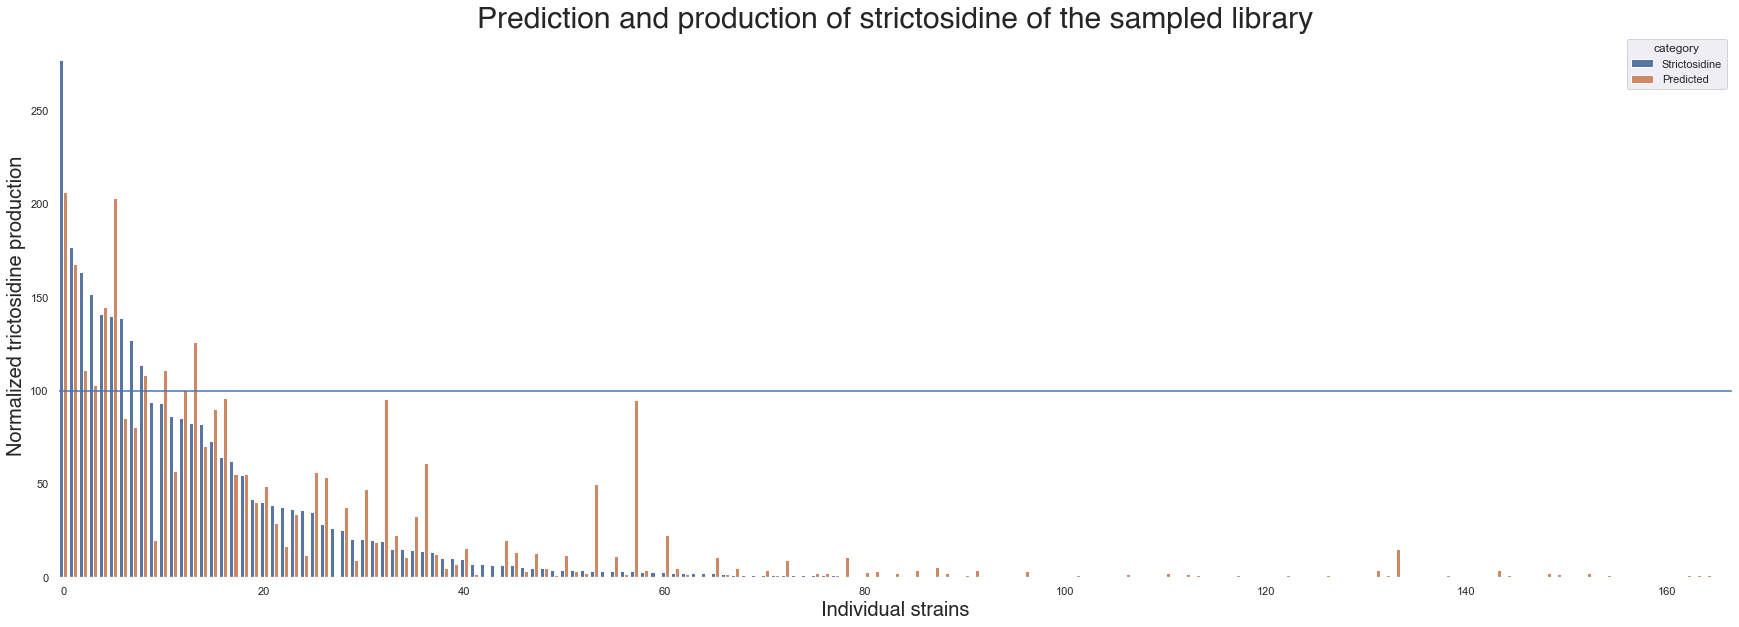

In [97]:
sns.set(rc = {'figure.figsize':(30,10) })

# initialize
ds1 = df3[['Line_name', 'Amt_norm']]
ds1.columns = ['Line_name', 'strict']

ds2 = df3[['Line_name', 'predict']]
ds2.columns = ['Line_name', 'strict']


ds2['category'] = 'Predicted'
ds1['category'] = 'Strictosidine'
dss = pd.concat([ds1, ds2])

ax = sns.barplot(x='Line_name', y='strict', hue='category', data=dss)

ax = plt.gca()
ax.set_xlabel('Individual strains', size = 20, fontname='Helvetica')
ax.set_ylabel('Normalized trictosidine production', size = 20, fontname='Helvetica')
ax.set_title('Prediction and production of strictosidine of the sampled library', size = 30, fontname='Helvetica')

# white background
ax.set_facecolor("white")

#plt.xticks([])
plt.xscale('linear') 

# normalized line
ax.axhline(100)


#ax.add_line
name = 'Prediction of the sampled library_ranked'
plt.savefig('ConStrain_on_google_colab/Data/Plots_for_publication/07_1_LEARN_DataAnalysis/'+name+'.pdf',format = 'pdf',  dpi = 120)

None

In [98]:
df3['norm_strict_measured_rank_pct']= df3['Amt_norm'].rank(pct=True)
df3['Predicted_strict_production_rank_pct'] = df3['predict'].rank(pct=True)
df3.to_csv('ConStrain_on_google_colab/Data/AutoML/input_for_ml_1st_iteration_w_predictions_and_ranking.csv')
df3

,index,Line_name,0,1,2,3,Amt_norm,predict,default_rank,default_rank_predicted,norm_strict_measured_rank_pct,Predicted_strict_production_rank_pct,color
0,0,yp50_D03,5,2,6,3,277.307816,206.562189,167.0,167.0,1.000000,1.000000,black
1,1,yp50_G03,6,2,6,5,176.917201,167.881893,166.0,165.0,0.994012,0.988024,black
2,2,yp50_E05,5,1,6,8,163.352037,111.284254,165.0,162.0,0.988024,0.970060,black
3,3,yp50_A09,4,2,6,3,152.013305,103.141986,164.0,159.0,0.982036,0.952096,black
4,4,yp51_A02,7,2,6,1,141.151036,144.520874,163.0,164.0,0.976048,0.982036,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,131,yp50_F12,6,4,7,4,0.000000,1.453369,30.0,83.0,0.179641,0.497006,black
163,132,yp51_E02,8,1,8,7,0.000000,1.052898,30.0,72.0,0.179641,0.431138,black
164,133,yp50_G06,6,4,6,6,0.000000,1.172344,30.0,77.0,0.179641,0.461078,black
165,134,yp50_E03,5,4,7,7,0.000000,0.484213,30.0,40.5,0.179641,0.242515,black


In [15]:
from constrain.plotting.plotting import correlation_plot

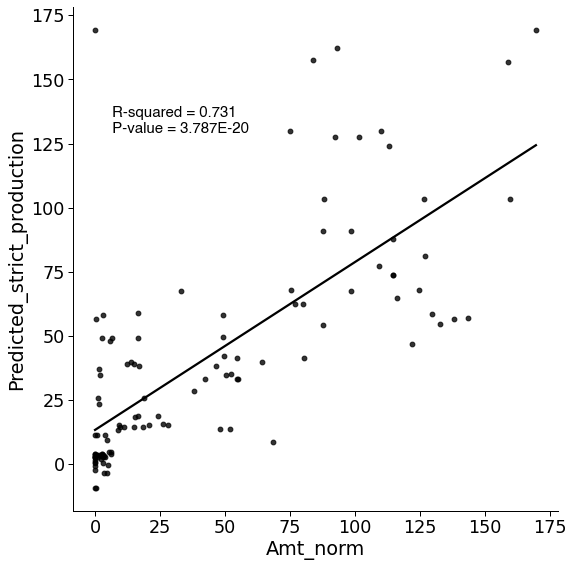

In [16]:
correlation_plot(df3,"Amt_norm","predict", save_pdf = True , path ='ConStrain_on_google_colab/Data/Plots_for_publication/07_1_LEARN_DataAnalysis/corr_plot_Amt_predict')

In [ ]:
correlation_plot(df3,"norm_strict_measured_rank_pct","Predicted_strict_production_rank_pct", save_pdf = True , 
                 path ='ConStrain_on_google_colab/Data/Plots_for_publication/07_1_LEARN_DataAnalysis/corr_plot_rank_rank_predict')

## 5. Find predicted genotypes

In [105]:
import numpy as np

In [106]:
all_genotypes = pd.read_csv('ConStrain_on_google_colab/Data/AutoML/systematic_names_on_all_combinations.csv')
all_genotypes_df = h2o.H2OFrame(pd.concat([all_genotypes], axis='columns'))
all_genotypes_df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


0,1,2,3
1,1,5,1
1,1,5,2
1,1,5,3
1,1,5,4
1,1,5,5
1,1,5,6
1,1,5,7
1,1,5,8
1,1,5,9
1,1,5,10


In [107]:
input_fixed = new_input_for_ml[['0','1','2','3']]
input_fixed

,0,1,2,3
73,5,2,6,3
75,6,2,6,5
86,5,1,6,8
106,4,2,6,3
126,7,2,6,1
...,...,...,...,...
60,5,3,5,7
114,5,4,8,6
24,2,3,7,8
27,3,3,7,10


### 5.1 Getting rid of the genotypes we have already tested:

In [108]:
df_diff = all_genotypes[~all_genotypes.apply(tuple,1).isin(input_fixed.apply(tuple,1))]
df_diff

,0,1,2,3
0,1,1,5,1
1,1,1,5,2
3,1,1,5,4
4,1,1,5,5
6,1,1,5,7
...,...,...,...,...
1275,8,4,8,6
1276,8,4,8,7
1277,8,4,8,8
1278,8,4,8,9


In [109]:
# make the diff into a df 
all_genotypes_df = h2o.H2OFrame(pd.concat([df_diff], axis='columns'))
all_genotypes_df['0']= all_genotypes_df['0'].asfactor()
all_genotypes_df['1']= all_genotypes_df['1'].asfactor()
all_genotypes_df['2'] = all_genotypes_df['2'].asfactor()
all_genotypes_df['3'] = all_genotypes_df['3'].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [110]:
predicted = best_model.predict(all_genotypes_df)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


In [111]:
len(predicted)

1121

In [112]:
predicted_norm = predicted.as_data_frame()
predicted_norm.head()

,predict
0,0.934026
1,0.701125
2,1.309903
3,0.562886
4,0.794757


## 6. Predict the  phenotypes from the whole library

In [113]:
# making predictions into a list
predicted_list = predicted_norm['predict'].values.tolist()

# Adding predictions to our dataframe
df_diff['predicted_norm_strict'] = predicted_list

# Sorting the dataframe
predicted_merged_sorted = df_diff.sort_values('predicted_norm_strict', ascending=False)
predicted_merged_sorted

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_8108/105107836.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff['predicted_norm_strict'] = predicted_list


,0,1,2,3,predicted_norm_strict
690,5,2,6,1,226.138557
693,5,2,6,4,210.261962
697,5,2,6,8,205.359575
691,5,2,6,2,204.539731
850,6,2,6,1,193.218189
...,...,...,...,...,...
884,6,3,5,5,-2.813507
1212,8,3,6,3,-3.103402
416,3,3,6,7,-3.587722
576,4,3,6,7,-3.955426


If we want the names on the genotypes we can do the following: 

In [114]:
g8h_list_of_index = ["Cacu", "Opum","Cro","Vmin","Smus","Rsep","Oeu","Ccal"]
cpr_list_of_index = ["Cro", "Aan","Ara","Clo","Rse","Ahu","Ani","Cac","Oeu","Cpo"]
promoters = ["CYC1", "ENO2","PCK1","RPL15B", "CCW12", "TPI1","MLS1","URE2"]

g8h_genotype = []
cpr_genotype = []

pg8h_genotype = []
pcpr_genotype = []

predicted_list = []
# adding index of genotypes to individual rows 
for index, row in predicted_merged_sorted.iterrows():
    g8h_genotype.append(g8h_list_of_index[int(row['0'])-1])
    cpr_genotype.append(cpr_list_of_index[int(row['3'])-1])
    pg8h_genotype.append(promoters[int(row['1'])-1])
    pcpr_genotype.append(promoters[int(row['2'])-1])
    predicted_list.append(row['predicted_norm_strict'])
    
    
list_of_lists = [g8h_genotype,pg8h_genotype,pcpr_genotype, cpr_genotype, predicted_list  ]

## 7. Top 20 predicted producers of the unseen library

In [115]:
df_with_genotypes = pd.DataFrame(list_of_lists )
df_with_genotypes = df_with_genotypes.T
df_with_genotypes.columns = ['G8H', 'pG8H', 'pCPR', 'CPR', 'Predicted_strict_production']
df_with_genotypes.head(10)

,G8H,pG8H,pCPR,CPR,Predicted_strict_production
0,Smus,ENO2,TPI1,Cro,226.138557
1,Smus,ENO2,TPI1,Clo,210.261962
2,Smus,ENO2,TPI1,Cac,205.359575
3,Smus,ENO2,TPI1,Aan,204.539731
4,Rsep,ENO2,TPI1,Cro,193.218189
5,Rsep,ENO2,TPI1,Cac,192.020389
6,Smus,ENO2,CCW12,Ara,182.996879
7,Smus,ENO2,TPI1,Rse,181.701094
8,Rsep,ENO2,TPI1,Aan,177.737893
9,Smus,ENO2,CCW12,Cro,174.18686


In [17]:
from constrain.plotting.plotting import bar_plot

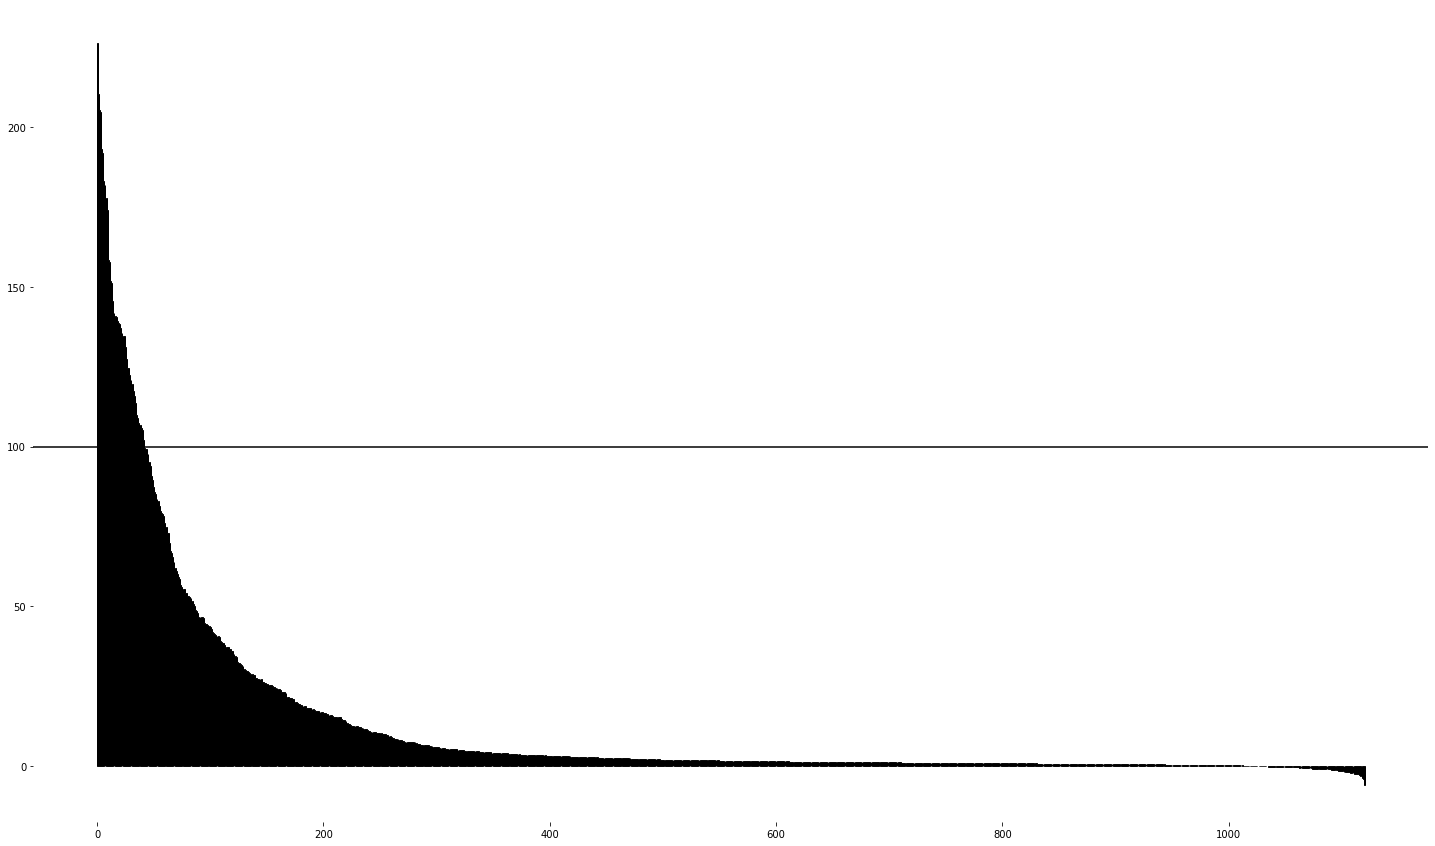

In [23]:
x = list(df_with_genotypes.index)
y = list(df_with_genotypes['Predicted_strict_production'])

bar_plot(x, y)


In [24]:
df_with_genotypes

,G8H,pG8H,pCPR,CPR,Predicted_strict_production,names
0,Smus,ENO2,TPI1,Cro,226.138557,Smus-ENO2_TPI1_Cro
1,Smus,ENO2,TPI1,Clo,210.261962,Smus-ENO2_TPI1_Clo
2,Smus,ENO2,TPI1,Cac,205.359575,Smus-ENO2_TPI1_Cac
3,Smus,ENO2,TPI1,Aan,204.539731,Smus-ENO2_TPI1_Aan
4,Rsep,ENO2,TPI1,Cro,193.218189,Rsep-ENO2_TPI1_Cro
...,...,...,...,...,...,...
1116,Rsep,PCK1,CCW12,Rse,-2.813507,Rsep-PCK1_CCW12_Rse
1117,Ccal,PCK1,TPI1,Ara,-3.103402,Ccal-PCK1_TPI1_Ara
1118,Cro,PCK1,TPI1,Ani,-3.587722,Cro-PCK1_TPI1_Ani
1119,Vmin,PCK1,TPI1,Ani,-3.955426,Vmin-PCK1_TPI1_Ani


Lets save the dataframes into csv files

In [28]:
# getting a unique name
from datetime import datetime
now = datetime.now() # current date and time
time = now.strftime("%Y_%m_%d_%H:%M_")

name = 'top_ML_predicted_after_first_DBTL_merged_analytics'
path = 'ConStrain_on_google_colab/Data/AutoML/'

In [29]:
df_with_genotypes.to_csv(path+time+name+'.csv', index=False)

In [30]:
#df_with_genotypes.to_csv('ConStrain_on_google_colab/Data/Plots_for_publication/ML_DBTL1/predicted_unseen_comb_ML1_trained_on_merged_data_ranked.csv')

In [51]:
#df_with_genotypes = pd.read_csv('ConStrain_on_google_colab/Data/AutoML/top_ML_predicted_after_first_DBTL_merged_analytics.csv')

In [52]:
df_with_genotypes

,G8H,pG8H,pCPR,CPR,Predicted_strict_production,names
0,Smus,ENO2,TPI1,Cro,226.138557,Smus-ENO2_TPI1_Cro
1,Smus,ENO2,TPI1,Clo,210.261962,Smus-ENO2_TPI1_Clo
2,Smus,ENO2,TPI1,Cac,205.359575,Smus-ENO2_TPI1_Cac
3,Smus,ENO2,TPI1,Aan,204.539731,Smus-ENO2_TPI1_Aan
4,Rsep,ENO2,TPI1,Cro,193.218189,Rsep-ENO2_TPI1_Cro
...,...,...,...,...,...,...
1116,Rsep,PCK1,CCW12,Rse,-2.813507,Rsep-PCK1_CCW12_Rse
1117,Ccal,PCK1,TPI1,Ara,-3.103402,Ccal-PCK1_TPI1_Ara
1118,Cro,PCK1,TPI1,Ani,-3.587722,Cro-PCK1_TPI1_Ani
1119,Vmin,PCK1,TPI1,Ani,-3.955426,Vmin-PCK1_TPI1_Ani


In [53]:
df_with_genotypes['names'] = df_with_genotypes['G8H']+'-' +df_with_genotypes['pG8H']+ '_'+ df_with_genotypes['pCPR']+'_'+df_with_genotypes['CPR']

In [54]:
df_with_genotypes

,G8H,pG8H,pCPR,CPR,Predicted_strict_production,names
0,Smus,ENO2,TPI1,Cro,226.138557,Smus-ENO2_TPI1_Cro
1,Smus,ENO2,TPI1,Clo,210.261962,Smus-ENO2_TPI1_Clo
2,Smus,ENO2,TPI1,Cac,205.359575,Smus-ENO2_TPI1_Cac
3,Smus,ENO2,TPI1,Aan,204.539731,Smus-ENO2_TPI1_Aan
4,Rsep,ENO2,TPI1,Cro,193.218189,Rsep-ENO2_TPI1_Cro
...,...,...,...,...,...,...
1116,Rsep,PCK1,CCW12,Rse,-2.813507,Rsep-PCK1_CCW12_Rse
1117,Ccal,PCK1,TPI1,Ara,-3.103402,Ccal-PCK1_TPI1_Ara
1118,Cro,PCK1,TPI1,Ani,-3.587722,Cro-PCK1_TPI1_Ani
1119,Vmin,PCK1,TPI1,Ani,-3.955426,Vmin-PCK1_TPI1_Ani


In [55]:
x_axis = list(df_with_genotypes['names'])[:20][::-1]
y_axis = list(df_with_genotypes['Predicted_strict_production'])[:20][::-1]

In [56]:
from constrain.plotting.plotting import horisontal_bar_plot

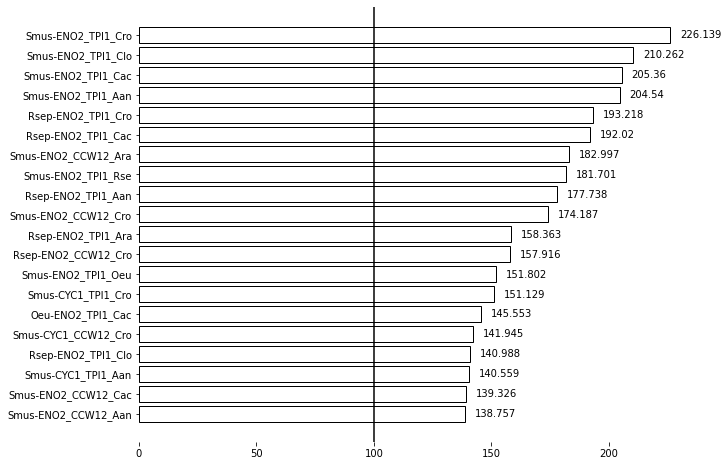

In [57]:
horisontal_bar_plot(x_axis,y_axis)

## 8. Learning curve on data

In [1]:
from constrain.machine_learning.auto_ml import autoML_on_partitioned_data

In [136]:
#feature_cols = ['0', '1', '2', '3']
#training_column = 'Amt_norm'
#
## Training 5 partitions 5 times
#for i in range(0,5): 
#    autoML_on_partitioned_data(feature_cols, training_column,new_input_for_ml,training_time=2, partitions = 5,  path = 'ConStrain_on_google_colab/Data/')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
15:45:10.272: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 34.0.

██████████████████████████████████
15:45:11.389: StackedEnsemble_BestOfFamily_2_AutoML_127_20221212_154509 [StackedEnsemble best_of_family_2 (built with AUTO metalearner, using top model from each algorithm type)] failed: java.lang.RuntimeException: water.exceptions.H2OIllegalArgumentException: Not enough data to create 10 random cross-validation spli

In [41]:
import os

# folder path
dir_path = 'ConStrain_on_google_colab/Data/AutoML/testing_partitioning/'

# list file and directories
res = os.listdir(dir_path)
res

['2022_12_12_13:43_ml_models_running_over_partioned_data.csv',
 '2022_12_12_03:42_ml_models_running_over_partioned_data.csv',
 '2022_12_12_17:46_ml_models_running_over_partioned_data.csv',
 '2022_12_12_08:42_ml_models_running_over_partioned_data.csv',
 '2022_12_12_22:43_ml_models_running_over_partioned_data.csv',
 '.ipynb_checkpoints']

In [42]:
lst_of_pd_dataframes = []
for ml_partitioned in res:
    if ml_partitioned.endswith('.csv'):
        lst_of_pd_dataframes.append(pd.read_csv(dir_path+ml_partitioned))

Lets retrieve the data 

In [43]:
dfs = [df.set_index('Unnamed: 0') for df in lst_of_pd_dataframes]
concated = pd.concat(dfs, axis=1)
concated

,0,CV_mean_MAE,CV_SD_MAE,Model_name,0,CV_mean_MAE,CV_SD_MAE,Model_name,0,CV_mean_MAE,CV_SD_MAE,Model_name,0,CV_mean_MAE,CV_SD_MAE,Model_name,0,CV_mean_MAE,CV_SD_MAE,Model_name
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
34,8.733436,25.789782,14.931739,XGBoost_grid_1_AutoML_21_20221211_84245_model_42,9.083024,25.401035,13.331240,XGBoost_grid_1_AutoML_11_20221210_224400_model...,6.675266,24.910587,12.280169,XGBoost_grid_1_AutoML_1_20221210_125031_model_...,8.733436,25.789782,14.931739,XGBoost_grid_1_AutoML_16_20221211_34239_model_42,9.083024,25.401035,13.331240,XGBoost_grid_1_AutoML_6_20221210_174626_model_413
68,11.985398,26.259956,10.220875,GBM_grid_1_AutoML_22_20221211_94239_model_86,6.301959,24.978912,7.250958,DeepLearning_grid_1_AutoML_12_20221210_234350_...,6.967622,22.461763,8.040198,DeepLearning_grid_2_AutoML_2_20221210_135023_m...,16.109195,24.619497,9.166811,DeepLearning_grid_1_AutoML_17_20221211_44239_m...,8.278626,24.900389,15.947713,StackedEnsemble_BestOfFamily_6_AutoML_7_202212...
102,9.272970,16.755064,6.498705,XGBoost_grid_1_AutoML_23_20221211_104235_model_77,6.116205,15.227977,9.801578,StackedEnsemble_BestOfFamily_6_AutoML_13_20221...,10.127439,15.153594,5.785358,XGBoost_lr_search_selection_AutoML_3_20221210_...,8.081040,15.894132,6.212905,XGBoost_grid_1_AutoML_18_20221211_54224_model_165,8.784116,15.486078,5.834875,XGBoost_lr_search_selection_AutoML_8_20221210_...
136,7.679380,13.364266,7.917948,StackedEnsemble_BestOfFamily_5_AutoML_24_20221...,6.120382,10.771065,4.090960,DeepLearning_grid_1_AutoML_14_20221211_14226_m...,5.948082,11.768704,4.558317,XGBoost_lr_search_selection_AutoML_4_20221210_...,5.988667,11.953938,4.528992,XGBoost_grid_1_AutoML_19_20221211_64227_model_165,7.402879,12.462551,7.096219,StackedEnsemble_BestOfFamily_5_AutoML_9_202212...
169,6.015689,11.216352,3.722828,XGBoost_grid_1_AutoML_25_20221211_124300_model_77,5.621644,9.775297,6.148426,StackedEnsemble_BestOfFamily_5_AutoML_15_20221...,6.163272,10.099213,5.935413,StackedEnsemble_BestOfFamily_5_AutoML_5_202212...,4.915927,10.203562,3.874008,XGBoost_grid_1_AutoML_20_20221211_74241_model_165,4.581688,9.884541,3.341709,DeepLearning_grid_1_AutoML_10_20221210_214412_...


In [44]:
# test results
test_results = concated[['0']]
test_results['mean'] = test_results.mean(axis=1)
test_results['std'] = test_results.std(axis=1)
test_results

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_4180/3993207297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_results['mean'] = test_results.mean(axis=1)
/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_4180/3993207297.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_results['std'] = test_results.std(axis=1)


,0,0,0,0,0,mean,std
Unnamed: 0,,,,,,,
34,8.733436,9.083024,6.675266,8.733436,9.083024,8.461637,0.906765
68,11.985398,6.301959,6.967622,16.109195,8.278626,9.928560,3.662581
102,9.272970,6.116205,10.127439,8.081040,8.784116,8.476354,1.355136
136,7.679380,6.120382,5.948082,5.988667,7.402879,6.627878,0.752934
169,6.015689,5.621644,6.163272,4.915927,4.581688,5.459644,0.615948


In [45]:
# Cross-validated mean MAE
cross_validated_results = concated[['CV_mean_MAE']]
cross_validated_results['mean'] = cross_validated_results.mean(axis=1)
cross_validated_results

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_4180/994047639.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cross_validated_results['mean'] = cross_validated_results.mean(axis=1)


,CV_mean_MAE,CV_mean_MAE,CV_mean_MAE,CV_mean_MAE,CV_mean_MAE,mean
Unnamed: 0,,,,,,
34,25.789782,25.401035,24.910587,25.789782,25.401035,25.458444
68,26.259956,24.978912,22.461763,24.619497,24.900389,24.644103
102,16.755064,15.227977,15.153594,15.894132,15.486078,15.703369
136,13.364266,10.771065,11.768704,11.953938,12.462551,12.064105
169,11.216352,9.775297,10.099213,10.203562,9.884541,10.235793


In [46]:
# Cross-validated mean SD
cross_validated_results_sd = concated[['CV_SD_MAE']]
cross_validated_results_sd['mean'] = cross_validated_results_sd.mean(axis=1)
cross_validated_results_sd

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_4180/3504483626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cross_validated_results_sd['mean'] = cross_validated_results_sd.mean(axis=1)


,CV_SD_MAE,CV_SD_MAE,CV_SD_MAE,CV_SD_MAE,CV_SD_MAE,mean
Unnamed: 0,,,,,,
34,14.931739,13.331240,12.280169,14.931739,13.331240,13.761226
68,10.220875,7.250958,8.040198,9.166811,15.947713,10.125311
102,6.498705,9.801578,5.785358,6.212905,5.834875,6.826684
136,7.917948,4.090960,4.558317,4.528992,7.096219,5.638487
169,3.722828,6.148426,5.935413,3.874008,3.341709,4.604477


In [47]:
from constrain.plotting.plotting import plot_ml_learning_curve

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


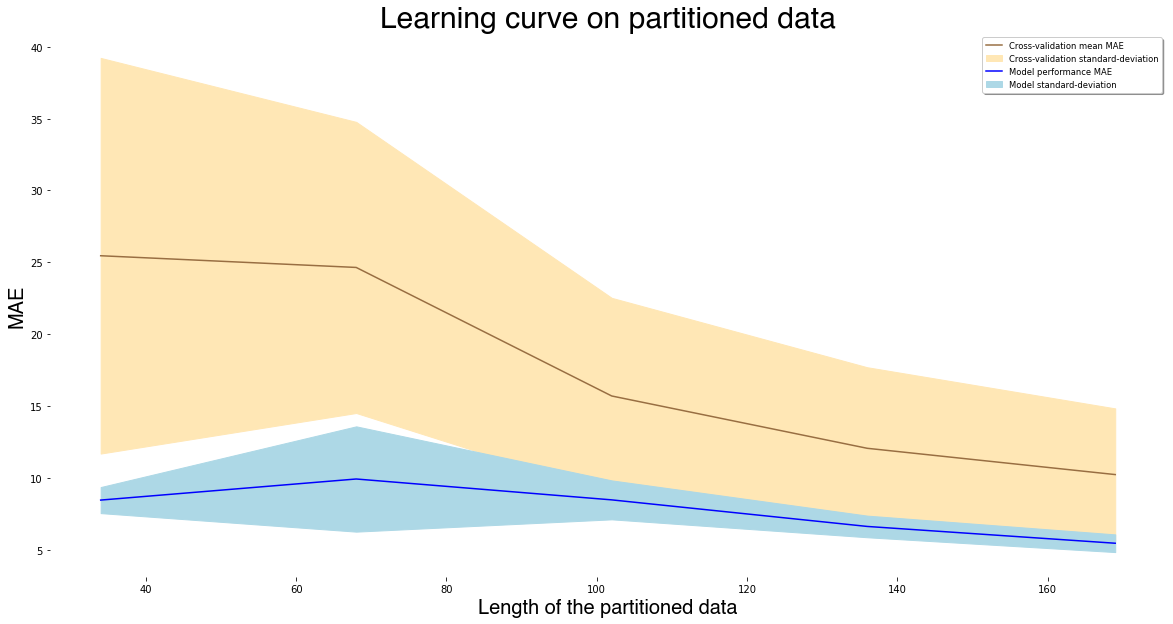

In [60]:
# CV
x = list(cross_validated_results.index)
y = list(cross_validated_results['mean'])
sd =  list(cross_validated_results_sd['mean'])

# model_performance
y1 = list(test_results['mean'])
sd1 = np.array(list(test_results['std']))


plot = plot_ml_learning_curve(x, y1, y,sd1,  sd, save_pdf = True , path = 'ConStrain_on_google_colab/Data/Plots_for_publication/07_1_LEARN_DataAnalysis/Learning_curve_on_partitioned_data_DBTL1')